## Shivashankarar Murugan

#### GRIP August'21

# TASK - 1 : Prediction using Supervised ML

### Problem Statement : 
####  Predict the percentage of an student based on the no. of study hours using supervised ML 

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

In [2]:
# read data
Dataset = "http://bit.ly/w-data"
data = pd.read_csv(Dataset)
print("Data is imported succesfully")
data

Data is imported succesfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# To print first 5 values from dataset
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# to print last 5 values from dataset
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
# shape - dimension of array (in this case its 25 rows and 2 columns)
data.shape

(25, 2)

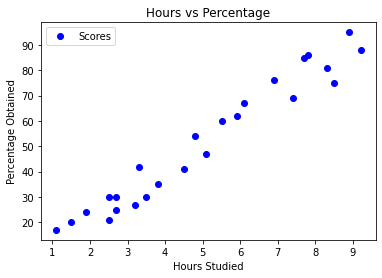

In [6]:
#plot dataset for visualisation
data.plot(x='Hours', y='Scores', style="o", color="blue")
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Obtained")
plt.show()

In [7]:
# few methods in pandas
data.sum()

Hours      125.3
Scores    1287.0
dtype: float64

In [8]:
data.count()

Hours     25
Scores    25
dtype: int64

In [9]:
data.mean()

Hours      5.012
Scores    51.480
dtype: float64

In [10]:
#Separate data , hours studied is independent variable and percentage is dependent variable
X = data.iloc[:,:1].values
Y = data.iloc[:,1].values
X,Y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

In [11]:
#split data into test and train sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("X_train=",X_train,"\nX_test=",X_test,"\nY_train=",Y_train,"\nY_test=",Y_test)

X_train= [[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]] 
X_test= [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]] 
Y_train= [35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41] 
Y_test= [20 27 69 30 62]


In [12]:
#Train Algorithm
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(X_train,Y_train)
print("Trained Algorithm for Dataset!")

Trained Algorithm for Dataset!


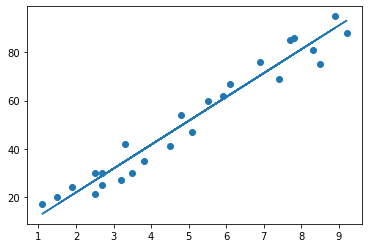

In [13]:
#Plot the regressor
line = regressor.coef_*X + regressor.intercept_    #equation of slope i.e, y=m*X+c
plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

In [14]:
#Predictions
print(X_test)
Y_pred = regressor.predict(X_test) # scores' prediction
print("\n",Y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]

 [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [15]:
#Comparision between actual v/s predicted scores
df = pd.DataFrame({'Actual': Y_test , 'Predicted': Y_pred}) 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [16]:
#predicting score if a student studies for 9.25 hrs/ day
hours = [[9.25]]   #data as an argument
own_pred = regressor.predict(hours)
print("No. of hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(own_pred[0]))

No. of hours = 9.25
Predicted Score = 93.69173248737538


In [17]:
#evaluation of the model
# Mean Absolute Error
print("Mean absolute Error =",metrics.mean_absolute_error(Y_test,Y_pred))
# Mean Squared Error
print("Mean squared Error =",metrics.mean_squared_error(Y_test,Y_pred))
# Root Mean Squared Error
print("Root mean squared Error =",np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

Mean absolute Error = 4.183859899002975
Mean squared Error = 21.5987693072174
Root mean squared Error = 4.6474476121003665


In [18]:
print("In conclusion,\nThe Predicted score is {0} if the student studies for {1}hrs/day. ".format(own_pred[0],hours[0][0]))

In conclusion,
The Predicted score is 93.69173248737538 if the student studies for 9.25hrs/day. 
